Dataset source
https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers 

- A1	Does your child look at you when you call his/her name?
- A2	Does your child look at you when you call his/her name?
- A3    Does your child point to indicate that s/he wants something? (e.g. a toy that is out of reach)
- A4    Does your child point to share interest with you? (e.g. poin9ng at an interes9ng sight)
- A5	Does your child pretend? (e.g. care for dolls, talk on a toy phone) 
- A6	Does your child follow where you’re looking? 
- A7    If you or someone else in the family is visibly upset, does your child show signs of wan9ng to comfort them? (e.g. stroking hair, hugging them)
- A8	Would you describe your child’s first words as: 
- A9	Does your child use simple gestures? (e.g. wave goodbye) 
- A10	Does your child stare at nothing with no apparent purpose? 
- Sex
- Ethnicity
- Born with jaundice (Boolean)
- Family member with ASD (Boolean)
- Who is completing the test (Parent, self, caregiver, medical staff, clinician ,etc.)
- Why_are_you_taken_the_screening	
- Class variable (classification flag, Y or N ASD)


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("Dataset_Kaggle_Toddler.csv")
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [21]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [22]:
df_columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Sex', 'Ethnicity', 'Jaundice','Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits ']

<AxesSubplot:>

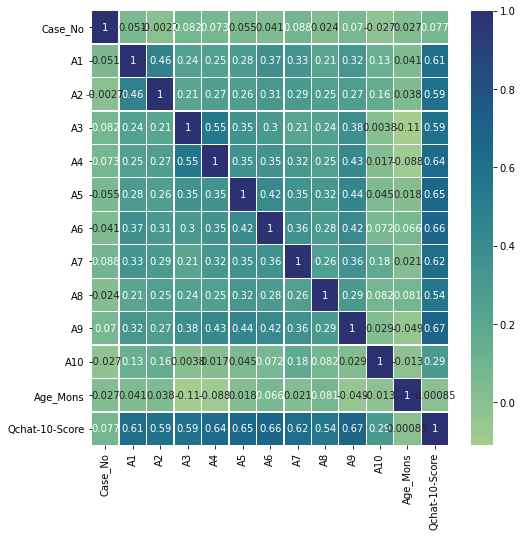

In [15]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corr_matrix, cmap = 'crest', annot = True, linewidths=.3)

In [36]:
df['Who completed the test'] = df['Who completed the test'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

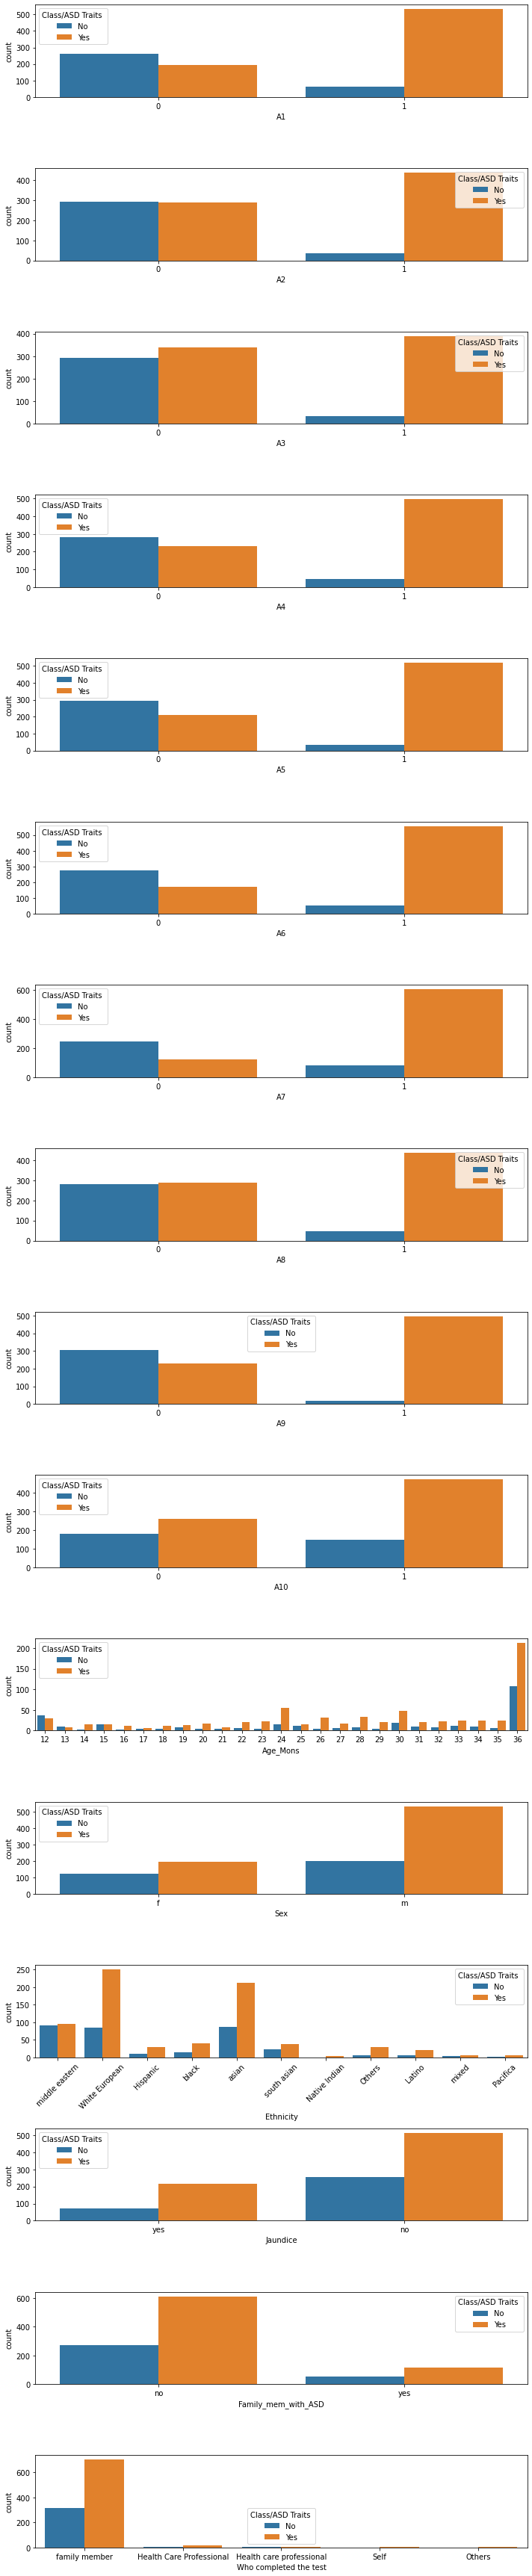

In [54]:
len_col = len(df_columns)
num_fig = len_col - 1

fig, axes = plt.subplots(num_fig, 1, figsize = (10, num_fig * 3))

count = 0
for column in df_columns[0:len_col-1]:
    
    my_plot = sns.countplot(x = column, data=df, hue='Class/ASD Traits ', ax = axes[count])
    axes[count].set_xlabel(column)

    if(column == 'Ethnicity'):
        my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
    count += 1

fig.tight_layout()